In [1]:
! pip install scikit-optimize
import numpy as np
import pandas as pd
from skopt.sampler import Sobol
from skopt.space import Real
import pandas as pd
import math

In [5]:
# Set number of samples and seed
n_samples = 10000
np.random.seed(42)

# Define parameter space
space = [
    # first layer
    Real(5, 20, name='HBO1'),
    Real(2.5, 12.5, name='HHB1'),
    Real(2.5, 12.5, name='CCO1'),
    
    # Second layer
    Real(25, 55, name='HBO2'),
    Real(15, 35, name='HHB2'),
    Real(2.5, 12.5, name='CCO2'),
    
    # other properties
    Real(10, 20, name='d1'),
    Real(0.9, 6.9, name='a1'),
    Real(1.1, 4.2, name='a2'),
    Real(0.1, 2.5, name='b1'),
    Real(0.3, 3.3, name='b2'),
]

# Initialize Sobol sampler
sobol = Sobol()

# Generate samples
samples = sobol.generate(space, n_samples)

# Convert to DataFrame
df_sobol = pd.DataFrame(samples, columns=[dim.name for dim in space])
df_sobol['d1'] = df_sobol['d1'].round(0)
df_sobol['ID'] = np.arange(1, len(df_sobol) + 1)

# Preview
print(df_sobol.head())

# Export to CSV
df_sobol.to_csv("satge1.csv", index=False)

C:\Users\Haiya\anaconda3\Lib\site-packages\skopt\sampler\sobol.py:521: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+10000=10000. 
  warnings.warn(


        HBO1       HHB1       CCO1       HBO2       HHB2       CCO2    d1  \
0  10.618102  12.007143   9.819939  42.959755  18.120373   4.059945  11.0   
1  18.118102   7.007143   4.819939  27.959755  28.120373   9.059945  16.0   
2   6.868102   4.507143   7.319939  50.459755  33.120373   6.559945  18.0   
3  14.368102   9.507143  12.319939  35.459755  23.120373  11.559945  13.0   
4  16.243102   5.757143   6.069939  46.709755  15.620373   2.809945  12.0   

         a1        a2        b1        b2  ID  
0  6.097057  2.963457  1.799374  0.361753   1  
1  3.097057  1.413457  0.599374  1.861753   2  
2  1.597057  3.738457  1.199374  1.111753   3  
3  4.597057  2.188457  2.399374  2.611753   4  
4  3.847057  3.350957  1.499374  1.486753   5  


In [7]:
# Load or use existing df_sobol
n_parts = 20
total_rows = len(df_sobol)
rows_per_part = total_rows // n_parts

for i in range(n_parts):
    start = i * rows_per_part
    end = (i + 1) * rows_per_part if i < n_parts - 1 else total_rows
    part_df = df_sobol.iloc[start:end]
    part_df.to_csv(f"stage2_part_{i+1}.csv", index=False)
    print(f"Saved rows {start} to {end-1} → stage1_part_{i+1}.csv")

Saved rows 0 to 499 → stage1_part_1.csv
Saved rows 500 to 999 → stage1_part_2.csv
Saved rows 1000 to 1499 → stage1_part_3.csv
Saved rows 1500 to 1999 → stage1_part_4.csv
Saved rows 2000 to 2499 → stage1_part_5.csv
Saved rows 2500 to 2999 → stage1_part_6.csv
Saved rows 3000 to 3499 → stage1_part_7.csv
Saved rows 3500 to 3999 → stage1_part_8.csv
Saved rows 4000 to 4499 → stage1_part_9.csv
Saved rows 4500 to 4999 → stage1_part_10.csv
Saved rows 5000 to 5499 → stage1_part_11.csv
Saved rows 5500 to 5999 → stage1_part_12.csv
Saved rows 6000 to 6499 → stage1_part_13.csv
Saved rows 6500 to 6999 → stage1_part_14.csv
Saved rows 7000 to 7499 → stage1_part_15.csv
Saved rows 7500 to 7999 → stage1_part_16.csv
Saved rows 8000 to 8499 → stage1_part_17.csv
Saved rows 8500 to 8999 → stage1_part_18.csv
Saved rows 9000 to 9499 → stage1_part_19.csv
Saved rows 9500 to 9999 → stage1_part_20.csv


### Plottings 

In [6]:
df_sobol

HBO1       HHB1       HBO2       HHB2    d1        a1        a2  \
0     10.618102  12.007143  46.959818  26.973170  12.0  1.835967  1.280059   
1     18.118102   7.007143  31.959818  16.973170  17.0  4.835967  2.830059   
2      6.868102   4.507143  39.459818  31.973170  19.0  3.335967  3.605059   
3     14.368102   9.507143  54.459818  21.973170  14.0  6.335967  2.055059   
4     16.243102   5.757143  35.709818  29.473170  10.0  1.085967  1.667559   
...         ...        ...        ...        ...   ...       ...       ...   
9995  17.249266   7.471621  46.225565  15.558375  15.0  2.176177  1.721484   
9996  15.374266   3.721621  49.975565  18.058375  11.0  2.926177  2.108984   
9997   7.874266   8.721621  34.975565  28.058375  16.0  5.926177  3.658984   
9998  19.124266   6.221621  42.475565  23.058375  14.0  4.426177  2.883984   
9999  11.624266  11.221621  27.475565  33.058375  19.0  1.426177  1.333984   

            b1        b2     ID  
0     2.178823  2.103345      1  
1     0.978823  0.603345      2  
2     0.378823  2.853345      3  
3     1.578823  1.353345      4  
4     1.278823  2.478345      5  
...        ...       ...    ...  
9995  0.661098  2.686170   9996  
9996  0.361098  1.561170   9997  
9997  1.561098  3.061170   9998  
9998  0.961098  0.811170   9999  
9999  2.161098  2.311170  10000  

[10000 rows x 10 columns]

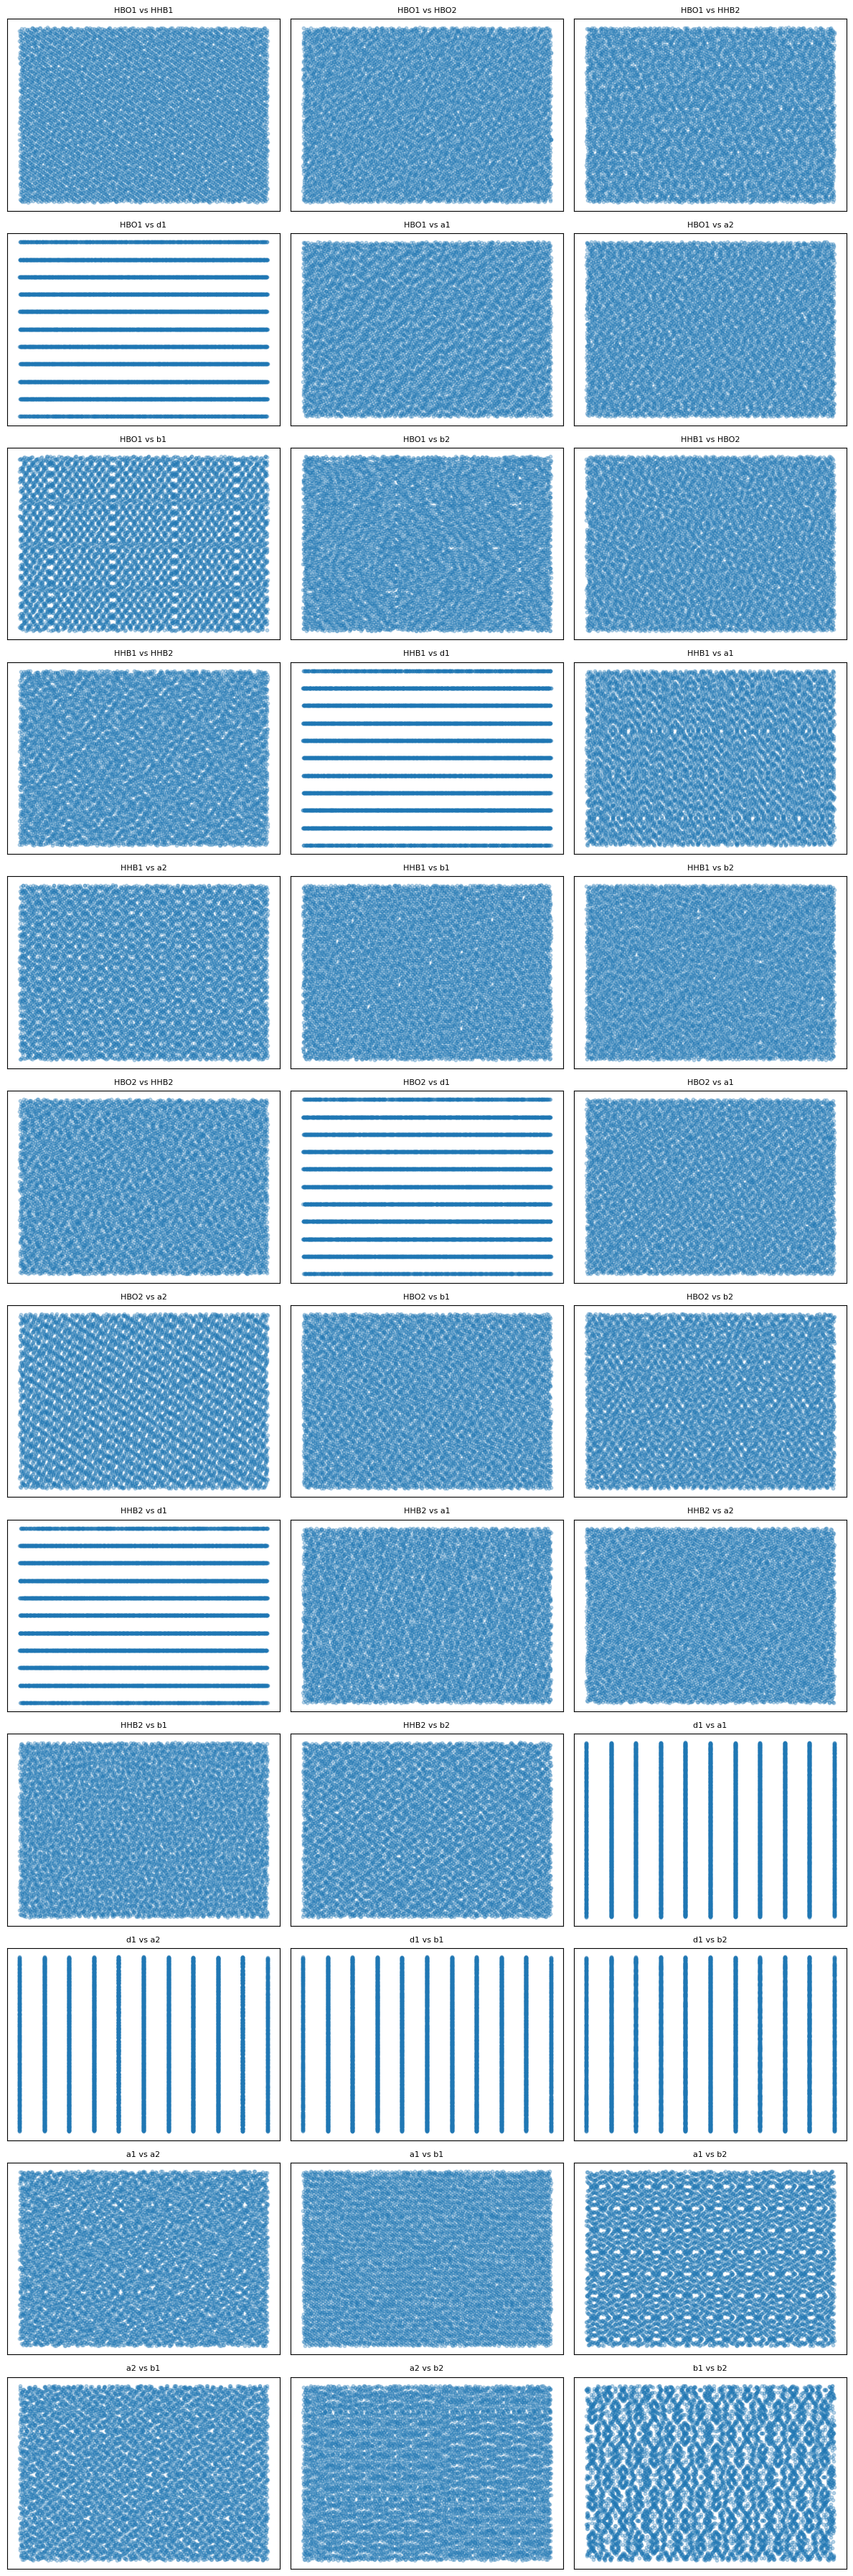

In [7]:
import matplotlib.pyplot as plt
import itertools

# Get first 9 parameter columns (exclude ID if present)
cols = df_sobol.columns[:9]
pairs = list(itertools.combinations(cols, 2))  # 36 combinations

fig, axs = plt.subplots(nrows=12, ncols=3, figsize=(12, 36))
axs = axs.flatten()

for i, (x_col, y_col) in enumerate(pairs):
    ax = axs[i]
    ax.scatter(df_sobol[x_col], df_sobol[y_col], alpha=0.3, s=10)
    ax.set_title(f'{x_col} vs {y_col}', fontsize=8)
    ax.set_xticks([])
    ax.set_yticks([])

# Turn off unused axes (if any)
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()
